<a href="https://colab.research.google.com/github/Rique3012/MecFlu2/blob/main/(Compartilhado)_Mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib cartopy xarray numpy

In [6]:
# Coordenadas das plataformas
plataformas = {
    'NAMORADO 2 (PNA-2)': (-22.45073, -40.41175),
    'PETROBRAS 26 (P-26)': (-22.4684, -40.02869),
    'PETROBRAS 32 (P-32)': (-22.2051, -40.1431),
    'PETROBRAS 37 (P-37)': (-22.4868, -40.09779),
    'PETROBRAS IX': (-22.57358, -40.82192),
    'PETROBRAS XIX': (-22.3927, -40.05438),
    'PETROBRAS XXXIII': (-22.37, -40.0267),
    'VERMELHO 1 (PVM-1)': (-22.16065, -40.27872),
    'VERMELHO 2 (PVM-2)': (-22.17535, -40.29147),
}

# Definir cores para cada plataforma
colors = {
    'NAMORADO 2 (PNA-2)': 'red',
    'PETROBRAS 26 (P-26)': 'blue',
    'PETROBRAS 32 (P-32)': 'green',
    'PETROBRAS 37 (P-37)': 'orange',
    'PETROBRAS IX': 'purple',
    'PETROBRAS XIX': 'brown',
    'PETROBRAS XXXIII': 'pink',
    'VERMELHO 1 (PVM-1)': 'cyan',
    'VERMELHO 2 (PVM-2)': 'yellow',
}

# Ajuste os limites de latitude e longitude conforme sua necessidade
lat_min, lat_max = -24, -21  # Exemplo de latitudes
lon_min, lon_max = -42, -39  # Exemplo de longitudes

# Escolher o tempo e o nível de pressão
tempo_escolhido = 0  # Índice do tempo
pressao_escolhida = 10  # Índice do nível de pressão

In [ ]:
# Testing data selection here
import xarray as xr
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import numpy as np
import pandas as pd

ds = xr.open_dataset('Era5_2023_CAMPOS.nc')
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
velocidade_u = ds_region['u']

v_in_one_point = velocidade_u.sel(latitude=-22.45073, longitude=-40.41175)
#velocidade_u_sem_extremas = velocidade_u.where(velocidade_u < )

KeyError: "not all values found in index 'latitude'. Try setting the `method` keyword argument (example: method='nearest')."

Tempo escolhido (arredondado): 2023-01-01 00:00:00
Pressão escolhida: 750.0 hPa


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


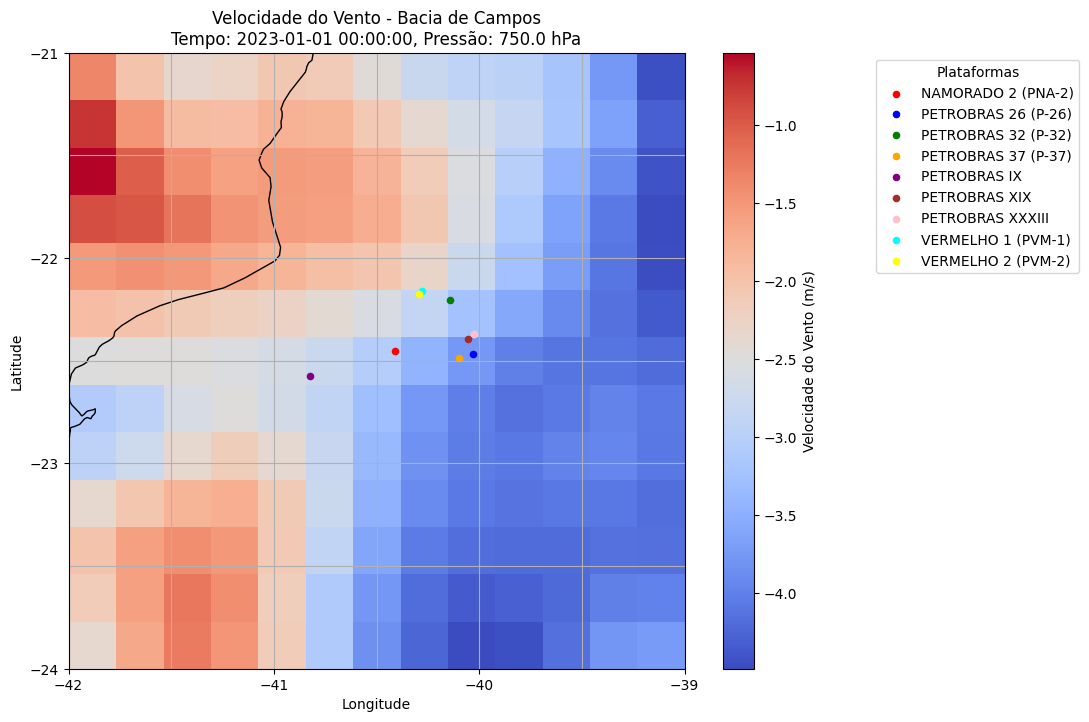

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd


# Abrir o arquivo NetCDF com os dados de vento
ds = xr.open_dataset('Era5_2023_CAMPOS.nc')


# Filtrar os dados para a região desejada
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# Selecionar a velocidade do vento em 'u' (componente do vento)
velocidade_u = ds_region['u']


# Selecionar a fatia do tempo e pressão
velocidade_slice_1 = velocidade_u.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_slice_2 = velocidade_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Criar a projeção
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar limites costeiros
ax.coastlines(resolution='10m')

# Definir limites de latitude e longitude
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plotar a magnitude da velocidade do vento usando imshow
img = ax.imshow(velocidade_slice_2, extent=[lon_min, lon_max, lat_min, lat_max],
transform=ccrs.PlateCarree(), cmap='coolwarm', origin='lower')

# Adicionar uma barra de cores (colorbar) com o rótulo da velocidade do vento
cbar = plt.colorbar(img, ax=ax, orientation='vertical', label='Velocidade do Vento (m/s)')

# Adicionar os marcadores das plataformas e a legenda
for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    # Plotar o marcador e adicionar à legenda
    scatter = ax.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)


# Adicionar título com pressão e tempo arredondado
plt.title(f'Velocidade do Vento - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')

# Adicionar rótulos de latitude e longitude nos eixos
ax.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())  # Marcações no eixo X (longitude)
ax.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())  # Marcações no eixo Y (latitude)

# Definir rótulos nos eixos
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adicionar gridlines para facilitar a visualização
ax.gridlines(draw_labels=False)

# Adicionar legenda
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)

# Exibir o gráfico
plt.show()


Tempo escolhido (arredondado): 2023-01-01 00:00:00
Pressão escolhida: 750.0 hPa


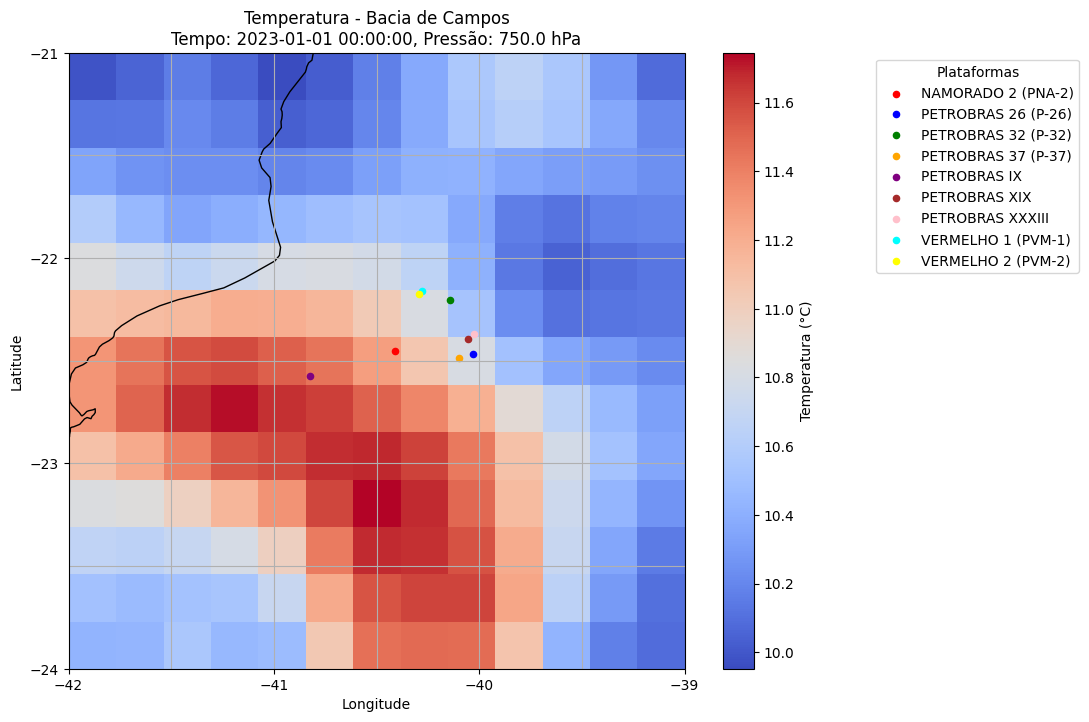

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

# Abrir o arquivo NetCDF com os dados de vento
ds = xr.open_dataset('Era5_2023_CAMPOS.nc')

# Filtrar os dados para a região desejada
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# Selecionar a temperatura (em Kelvin)
temp = ds_region['t']

# Converter a temperatura de Kelvin para Celsius
temp_celsius = temp - 273.15

# Selecionar a fatia do tempo e pressão
temperatura_slice_1 = temp_celsius.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
temperatura_slice_2 = temperatura_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Criar a projeção
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar limites costeiros
ax.coastlines(resolution='10m')

# Definir limites de latitude e longitude
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plotar a temperatura em Celsius usando imshow
img = ax.imshow(temperatura_slice_2, extent=[lon_min, lon_max, lat_min, lat_max],
transform=ccrs.PlateCarree(), cmap='coolwarm', origin='lower')

# Adicionar uma barra de cores (colorbar) com o rótulo em Celsius
cbar = plt.colorbar(img, ax=ax, orientation='vertical', label='Temperatura (°C)')

# Adicionar os marcadores das plataformas e a legenda
for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    # Plotar o marcador e adicionar à legenda
    scatter = ax.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)


# Adicionar título com pressão e tempo arredondado
plt.title(f'Temperatura - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')

# Adicionar rótulos de latitude e longitude nos eixos
ax.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())  # Marcações no eixo X (longitude)
ax.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())  # Marcações no eixo Y (latitude)

# Definir rótulos nos eixos
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adicionar gridlines para facilitar a visualização
ax.gridlines(draw_labels=False)

# Adicionar legenda
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)

# Exibir o gráfico
plt.show()


Tempo escolhido (arredondado): 2023-01-01 00:00:00
Pressão escolhida: 750.0 hPa
Tempo escolhido (arredondado): 2023-01-01 00:00:00
Pressão escolhida: 750.0 hPa


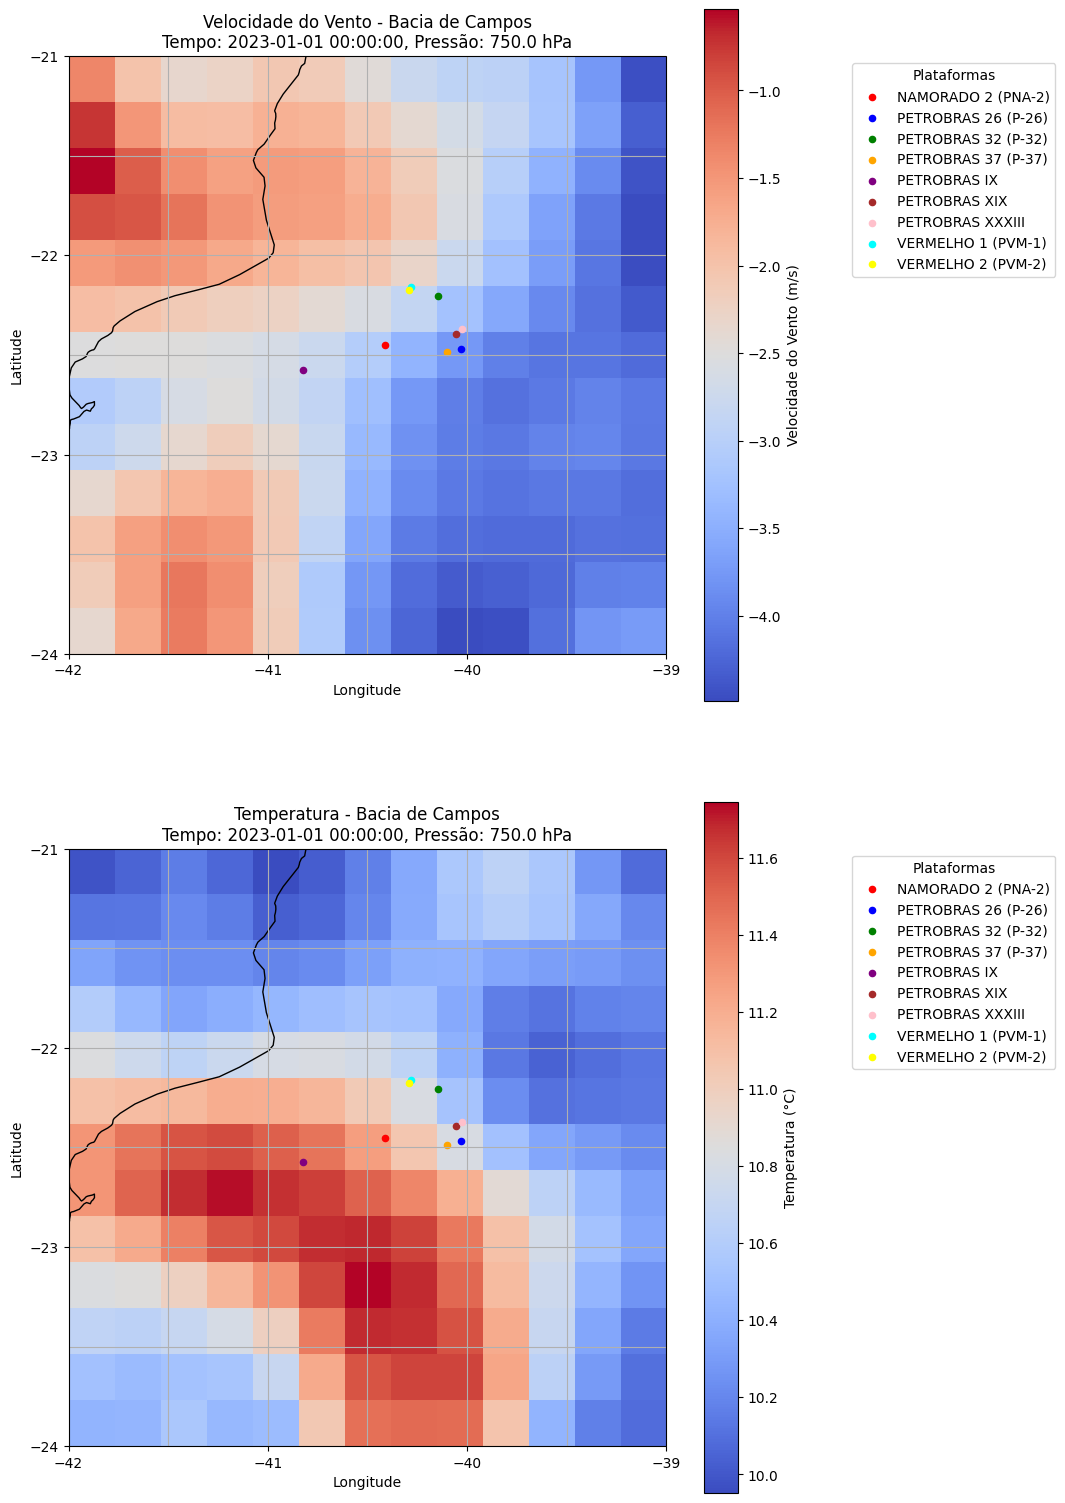

In [ ]:
# Importar bibliotecas necessárias
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd


# Abrir o arquivo NetCDF com os dados de vento
ds = xr.open_dataset('Era5_2023_CAMPOS.nc')

# Filtrar os dados para a região desejada
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# Selecionar a velocidade do vento em 'u' (componente do vento)
velocidade_u = ds_region['u']

# Selecionar a fatia do tempo e pressão
velocidade_slice_1 = velocidade_u.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_slice_2 = velocidade_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Criar a projeção para os gráficos
fig = plt.figure(figsize=(10, 16))  # Aumentar a altura para acomodar dois gráficos

# Gráfico da Velocidade do Vento
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
img = ax1.imshow(velocidade_slice_2, extent=[lon_min, lon_max, lat_min, lat_max],
                 transform=ccrs.PlateCarree(), cmap='coolwarm', origin='lower')
cbar1 = plt.colorbar(img, ax=ax1, orientation='vertical', label='Velocidade do Vento (m/s)')
for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    ax1.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)
plt.title(f'Velocidade do Vento - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')
ax1.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.gridlines(draw_labels=False)
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)

# Gráfico da Temperatura
# Selecionar a temperatura (em Kelvin)
temp = ds_region['t']

# Converter a temperatura de Kelvin para Celsius
temp_celsius = temp - 273.15

# Selecionar a fatia do tempo e pressão
temperatura_slice_1 = temp_celsius.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
temperatura_slice_2 = temperatura_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Gráfico da Temperatura
ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.coastlines(resolution='10m')
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
img = ax2.imshow(temperatura_slice_2, extent=[lon_min, lon_max, lat_min, lat_max],
                 transform=ccrs.PlateCarree(), cmap='coolwarm', origin='lower')
cbar2 = plt.colorbar(img, ax=ax2, orientation='vertical', label='Temperatura (°C)')
for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    ax2.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)
plt.title(f'Temperatura - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')
ax2.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.gridlines(draw_labels=False)
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()


          -42.00    -41.75    -41.50    -41.25    -41.00    -40.75    -40.50    -40.25    -40.00    -39.75    -39.50    -39.25    -39.00
-21.00  3.131907  2.662696  2.467501  2.858472  3.318110  3.855985  4.444605  4.747056  4.936510  4.898858  4.665002  4.273080  4.027587
-21.25  2.940420  2.677098  2.521485  2.769507  3.350080  4.020705  4.616111  4.948476  5.027956  4.947124  4.865815  4.647789  4.459717
-21.50  2.709476  2.597508  2.529614  2.746149  3.349538  4.038215  4.721821  5.107753  5.194375  5.164591  5.082827  4.999177  4.893353
-21.75  2.820652  2.786266  2.686913  2.784019  3.343057  3.990467  4.713818  5.200293  5.362271  5.353279  5.198326  5.152291  5.105601
-22.00  3.190859  3.130435  2.889929  2.846956  3.240773  3.733242  4.467258  5.181295  5.525233  5.577170  5.399918  5.243349  5.150400
-22.25  3.242952  3.177066  2.937424  2.868653  3.054846  3.357060  4.035034  4.919081  5.535717  5.825107  5.751886  5.453200  5.223663
-22.50  2.648790  2.747016  2.740415  2.7

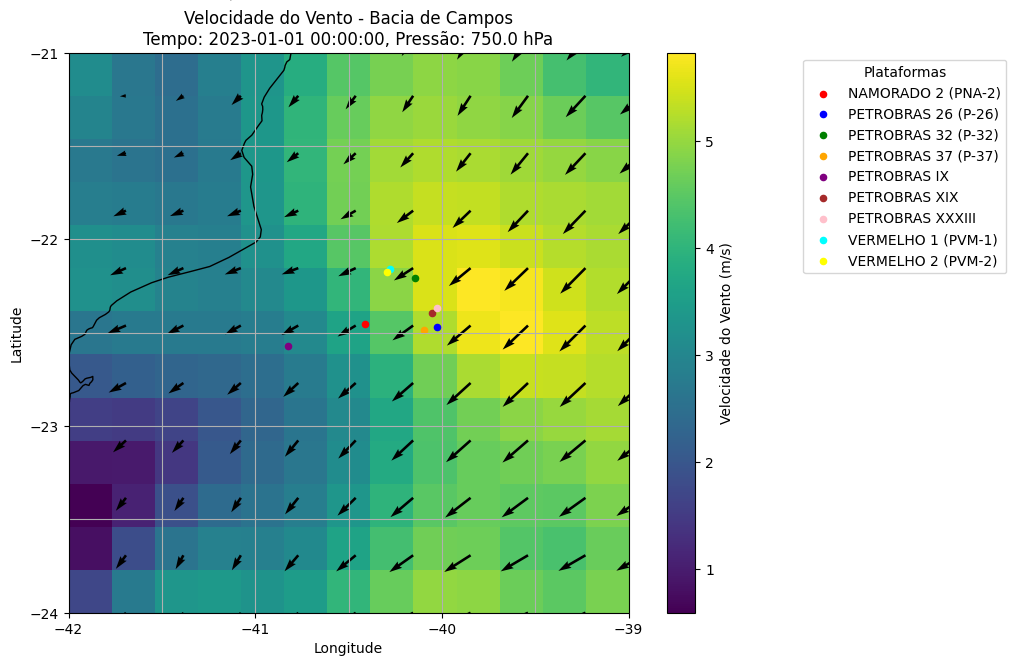

In [ ]:
# Importar bibliotecas necessárias
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

pd.set_option('display.expand_frame_repr', False)  # Não quebrar linhas

# Abrir o arquivo NetCDF com os dados de vento
ds = xr.open_dataset('Era5_2023_CAMPOS.nc')

# Filtrar os dados para a região desejada
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))

# Seleciona a velocidade do vento em 'u' e 'v' (componentes do vento)
velocidade_u = ds_region['u']
velocidade_v = ds_region['v']

# Selecionar a fatia do tempo e pressão
velocidade_u_slice_1 = velocidade_u.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_u_slice_2 = velocidade_u_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

velocidade_v_slice_1 = velocidade_v.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_v_slice_2 = velocidade_v_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter o valor absoluto do vento
velocidade_absoluta = np.sqrt(velocidade_u_slice_2**2 + velocidade_v_slice_2**2)

# Criar DataFrame com as coordenadas de latitude e longitude e os valores de velocidade do vento absoluta
velocidade_absoluta_df = pd.DataFrame(
    velocidade_absoluta.values,
    index=velocidade_absoluta.latitude.values,    # Linhas com valores de latitude
    columns=velocidade_absoluta.longitude.values  # Colunas com valores de longitude
)

# Exibir o DataFrame
print(velocidade_absoluta_df)
print('\n')

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Criar a projeção para os gráficos
fig = plt.figure(figsize=(10, 16))  # Aumentar a altura para acomodar dois gráficos

# Gráfico da Velocidade do Vento
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

img = ax1.imshow(velocidade_absoluta, extent=[lon_min, lon_max, lat_min, lat_max],
                 transform=ccrs.PlateCarree(), cmap='viridis', origin='upper')

delta_lat = (lat_max - lat_min+1)/len(velocidade_absoluta)
delta_lon = (lon_max - lon_min+1)/len(velocidade_absoluta)

latitude=np.arange(lat_min, lat_max + 1, delta_lat)
longitude=np.arange(lon_min, lon_max + 1, delta_lon)

Q = plt.quiver(longitude, latitude, velocidade_u_slice_2, velocidade_v_slice_2, transform=ccrs.PlateCarree())

qk = plt.quiverkey(Q, X=0.3, Y=1.1, U=2, label='2 m/s', labelpos='N', coordinates = 'axes')

cbar1 = plt.colorbar(img, ax=ax1, orientation='vertical', label='Velocidade do Vento (m/s)')

for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    ax1.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)

plt.title(f'Velocidade do Vento - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')
ax1.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.gridlines(draw_labels=False)
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)
plt.show()

In [5]:
# Importar bibliotecas necessárias
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

pd.set_option('display.expand_frame_repr', False)  # Não quebrar linhas

# Abrir o arquivo NetCDF com os dados de vento
ds = xr.open_dataset('Era5_2023_SOLAR_CAMPOS.nc')

# Filtrar os dados para a região desejada
ds_region = ds.sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
print(ds_region)

NameError: name 'lat_max' is not defined

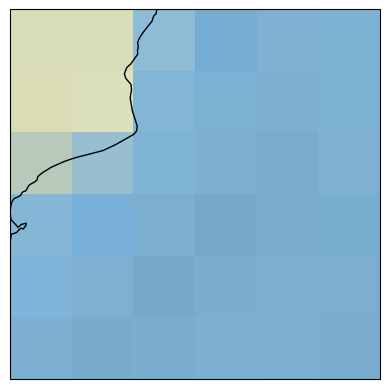

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines(resolution='10m')
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
plt.show()


In [ ]:
# Seleciona a velocidade do vento em 'u' e 'v' (componentes do vento)
velocidade_u = ds_region['u']
velocidade_v = ds_region['v']

# Selecionar a fatia do tempo e pressão
velocidade_u_slice_1 = velocidade_u.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_u_slice_2 = velocidade_u_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

velocidade_v_slice_1 = velocidade_v.isel(valid_time=tempo_escolhido)  # Selecionar o tempo
velocidade_v_slice_2 = velocidade_v_slice_1.isel(pressure_level=pressao_escolhida)  # Selecionar o nível de pressão

# Obter o valor absoluto do vento
velocidade_absoluta = np.sqrt(velocidade_u_slice_2**2 + velocidade_v_slice_2**2)

# Criar DataFrame com as coordenadas de latitude e longitude e os valores de velocidade do vento absoluta
velocidade_absoluta_df = pd.DataFrame(
    velocidade_absoluta.values,
    index=velocidade_absoluta.latitude.values,    # Linhas com valores de latitude
    columns=velocidade_absoluta.longitude.values  # Colunas com valores de longitude
)

# Exibir o DataFrame
print(velocidade_absoluta_df)
print('\n')

# Obter os valores reais de tempo e pressão
tempo_real = ds_region['valid_time'].isel(valid_time=tempo_escolhido).values
pressao_real = ds_region['pressure_level'].isel(pressure_level=pressao_escolhida).values

# Arredondar a hora usando pandas
tempo_real_rounded = pd.to_datetime(str(tempo_real)).round('h')

# Printar a pressão e o tempo arredondado escolhidos no console
print(f"Tempo escolhido (arredondado): {tempo_real_rounded}")
print(f"Pressão escolhida: {pressao_real} hPa")

# Criar a projeção para os gráficos
fig = plt.figure(figsize=(10, 16))  # Aumentar a altura para acomodar dois gráficos

# Gráfico da Velocidade do Vento
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m')
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

img = ax1.imshow(velocidade_absoluta, extent=[lon_min, lon_max, lat_min, lat_max],
                 transform=ccrs.PlateCarree(), cmap='viridis', origin='upper')

delta_lat = (lat_max - lat_min+1)/len(velocidade_absoluta)
delta_lon = (lon_max - lon_min+1)/len(velocidade_absoluta)

latitude=np.arange(lat_min, lat_max + 1, delta_lat)
longitude=np.arange(lon_min, lon_max + 1, delta_lon)

Q = plt.quiver(longitude, latitude, velocidade_u_slice_2, velocidade_v_slice_2, transform=ccrs.PlateCarree())

qk = plt.quiverkey(Q, X=0.3, Y=1.1, U=2, label='2 m/s', labelpos='N', coordinates = 'axes')

cbar1 = plt.colorbar(img, ax=ax1, orientation='vertical', label='Velocidade do Vento (m/s)')

for plataforma, coord in plataformas.items():
    color = colors[plataforma]
    ax1.scatter(coord[1], coord[0], color=color, marker='o', s=20, transform=ccrs.PlateCarree(), label=plataforma)

plt.title(f'Velocidade do Vento - Bacia de Campos\nTempo: {tempo_real_rounded}, Pressão: {pressao_real} hPa')
ax1.set_xticks(np.arange(lon_min, lon_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lat_min, lat_max + 1, 1), crs=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.gridlines(draw_labels=False)
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1.3, 1), frameon=True)
plt.show()

In [17]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 114.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


{-42.0: ([<matplotlib.lines.Line2D at 0x7b2289c9e680>],
  [Text(-41.997, -24.03, '42°W')])}

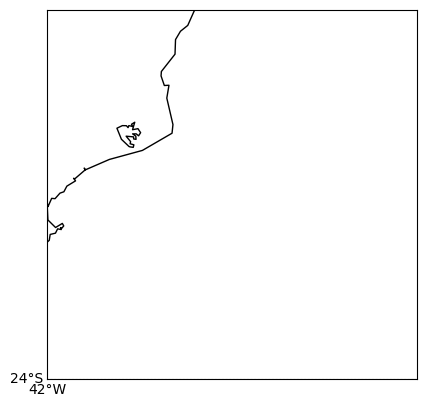

In [12]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='cyl', llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(lat_min,lat_max+0.25,5)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(lon_min,lon_max+0.25,10)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)